# Equipe dos Magos
- Componentes
    1. João Kruschewsky
    2. João Freitas
    3. Vito Magarão
    4. Vinícius Matos

- Atividade:
    
    O dataset que trabalharemos nesta atividade nos fornece dados de passageiros do Titanic, incluindo se eles sobreviveram ou não ao naufrágio. O desafio original do Kaggle propõe que seja criado um classificador capaz de identificar se um passageiro sobreviveu ou não ao desastre. Faremos isso, mas não agora.

    Considerem que ocorreu um desastre onde um bom número de pessoas morreu, mas outras sobreviveram. A principal pergunta que nos surge é: quais fatores foram determinantes para que alguns sobrevivessem e outros não?
    Vamos tentar responder essa pergunta por meio de uma tarefa de análise descritiva dos dados. Como vocês verão ao explorar o dataset, existe bastante trabalho de pré-processamento a ser realizado, contudo, lembrem-se que o objetivo aqui é que este tratamento dos dados busque auxiliar vocês analistas a identificarem padrões nos dados e não traduzi-los para que um algoritmo de aprendizado o faça.

    Ao final do código, incluam um resumo das informações relevantes encontradas.
    Minha sugestão é que vocês explorem ao máximo o dataset, entendam os atributos, como eles se relacionam com o target, mas não só com ele. Assim, vocês conseguirão identificar melhores estratégias de pré-processamento que virão a favorecer a qualidade da análise.

    Basta uma entrega por equipe, mas e imprescidível que vocês informem o nome dos integrantes da equipe.

- Links
    
    1. [Colab.ipnb](https://colab.research.google.com/drive/1MLOdFzWzBC-yB5w2L8-CVAra6RDzbcdf?authuser=1#scrollTo=xkv6Td-I4P6M)
    2. [Dataset](https://drive.google.com/file/d/1m-1Mepa2O2kn-FpzEPTVwADmVc40utSO/view?usp=drive_web&authuser=1)

In [ ]:
#Importação das bibliotecas básicas
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid") # set the background for the graphs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#Importação das bibliotecas de plotting
import plotly.graph_objs as go
from plotly.tools import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)

#Importação das bibliotecas para ignorar msgs de erro indesejadas
import warnings
warnings.filterwarnings("ignore")

#Importação das bibliotecas para análise estatística
from scipy import stats
from scipy.stats import levene
from scipy.stats import skew

from statsmodels.stats.proportion import proportions_ztest # For proportion Z-test
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA
from scipy.stats import chi2_contingency   # For Chi-Sq 

#Importação das bibliotecas para processamento, modelagem e classificação
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN

In [ ]:
#Importação dos datasets
train = pd.read_csv(r'https://raw.githubusercontent.com/MasterExecuson/Data-Science-Analytics/main/Pre-processing/titanic/dataset/titanic_train.csv')
test = pd.read_csv(r'https://raw.githubusercontent.com/MasterExecuson/Data-Science-Analytics/main/Pre-processing/titanic/dataset/test.csv')
df = train.copy()

In [ ]:
print(f"Total de {train.shape} Colunas e Linhas no Dataset de Treino")
print("---" *40)
print(f"Total de {test.shape} Colunas e Linhas no Dataset de Verificação")

Total de (891, 12) Colunas e Linhas no Dataset de Treino
------------------------------------------------------------------------------------------------------------------------
Total de (418, 11) Colunas e Linhas no Dataset de Verificação


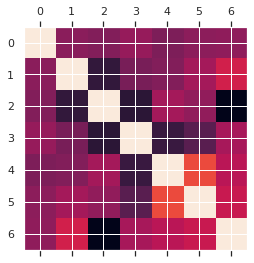

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000   



In [ ]:
corr_df = df.corr(method='pearson')
plt.matshow(corr_df)
plt.show()
print(corr_df, "\n")

# Filtros

In [ ]:
def columnCointainsString(series,string):
    return series.str.contains(string)

def isMale(series):
    return series=='male'

# Primeira Análise

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Unique das colunas do dataset

In [ ]:
df['Age'].value_counts().sort_values(ascending=False)[:20]

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
26.0    18
27.0    18
35.0    18
32.0    18
16.0    17
31.0    17
20.0    15
Name: Age, dtype: int64

In [ ]:
sex = df.groupby(['Sex']).agg({'Age':['mean']})
sex.reset_index()

,Sex,Age
,,mean
0,female,27.915709
1,male,30.726645


In [ ]:
[[column,df[column].unique()] for column in df.columns ]

[['PassengerId',
  array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
          27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
          40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
          53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
          66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
          79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
          92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
         105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
         118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
         131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
         144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
         157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
         170, 171, 17

Nota-se que existe uma cabine escrita como T. Como não há nível T no Titanic, esse dado precisará ser investigado.

In [ ]:
df[df['Cabin']=='T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


Por se tratar de apenas uma linha, este dado parece ser um erro, logo será substituido por NA.

In [ ]:
df.loc[df[df['Cabin']=='T'].index,'Cabin'] = np.nan

## Ajuste do tipo das variáveis

In [ ]:
df["Sex"] = df["Sex"].astype("category")
df["Embarked"] = df["Embarked"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")
df["Survived"] = df["Survived"].astype("bool")

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          688
Embarked         2
dtype: int64

## Análise

### Análise Univariada

#### Descrição das variáveis

In [ ]:
def desbribeColumn (df,col_index,unique=False):
    col_name = str(df.columns[col_index])
    print('Coluna ' + col_name + ": \n")
    print('Número de entradas nulas: ' + str(df[col_name].isna().sum()) )
    print( '\n\nDados estatísticos: \n')
    print(df[col_name].describe())
    if(unique):
        print( '\n\nValores de Entradas unicos: ')
        print( df[col_name].unique())
    else:
        print('\n')
        col_view_grouped = df[col_name].groupby(df[col_name]).count().sort_values(ascending = False)
        print(col_view_grouped)
    return


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        203 non-null    object  
 11  Embarked     889 non-null    category
dtypes: bool(1), category(3), float64(2), int64(3), object(3)
memory usage: 59.7+ KB


#####0. PassengerId

Tipo da variável: O ID de cada passageiro do navio. 

Input esperado: Valor único por coluna, em que cada passageiro tenha seu ID.

Problemas identificados:
* 0 Entradas nulas
* 0 Entradas duplicadas

Por se tratar de um número de identificação, a variável não contribui para a análise da sobrevivência durante o pré-processamento ou construção de modelo.

In [ ]:
desbribeColumn(df,0)

Coluna PassengerId: 

Número de entradas nulas: 0


Dados estatísticos: 

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64


PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


##### 1. Pclass

Tipo da variável: Categórica, representando qual a classe da passagem comprada pelo passageiro.

Input esperado: 1 = 1st, 2 = 2nd, 3 = 3rd

Problemas identificados:
* 0 Entradas nulas
* 0 Entradas duplicadas

Dados parecem consistentes e não parecem demandar ações ulteriores. 

In [ ]:
desbribeColumn(df, 2)

Coluna Pclass: 

Número de entradas nulas: 0


Dados estatísticos: 

count     891
unique      3
top         3
freq      491
Name: Pclass, dtype: int64


Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


#####2. Name

Tipo da variável: Nominal, representando o nome do passageiro.

Input esperado: uma entrada única tipo 'OBJECT' para cada linha

Problemas identificados:
* 0 Entradas nulas
* 0 Entradas duplicadas

Essa váriavel, por conter o honorífico do passageiro, pode trazer alguma análise válida sobre a diferença na sobrevivência/mortalidade de crianças e adulto de passageiros do mesmo sexo. 

In [ ]:
desbribeColumn(df, 3)

Coluna Name: 

Número de entradas nulas: 0


Dados estatísticos: 

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object


Name
Abbing, Mr. Anthony                        1
Nysveen, Mr. Johan Hansen                  1
Nicholson, Mr. Arthur Ernest               1
Nicola-Yarred, Master. Elias               1
Nicola-Yarred, Miss. Jamila                1
                                          ..
Goodwin, Miss. Lillian Amy                 1
Goodwin, Mr. Charles Edward                1
Goodwin, Mrs. Frederick (Augusta Tyler)    1
Graham, Miss. Margaret Edith               1
van Melkebeke, Mr. Philemon                1
Name: Name, Length: 891, dtype: int64


#####3. Sex

Tipo da variável: Categórica, representando o gênero do passageiro.

Input esperado: classificações de gênero impostas pelo formulário (male/female)

Problemas identificados:
* 0 Entradas nulas
* 0 Entradas duplicadas
* 0 Entradas conflitantes

A coluna em específico não requer tratamento.

In [ ]:
desbribeColumn(df,4)

Coluna Sex: 

Número de entradas nulas: 0


Dados estatísticos: 

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


Sex
male      577
female    314
Name: Sex, dtype: int64


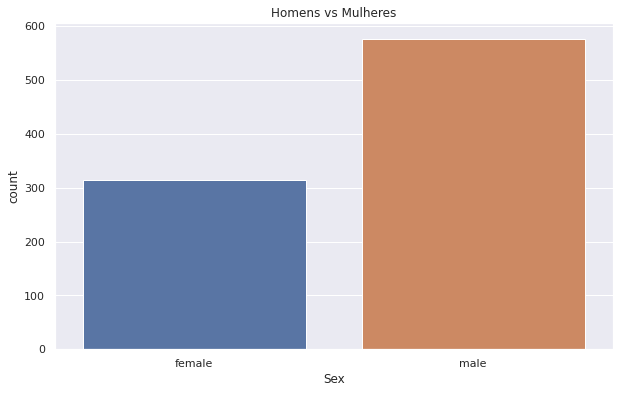

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Sex')
plt.title('Homens vs Mulheres')
plt.show()

#####4. Age

Tipo da variável: Contínua, representando a idade do passageiro na data da viagem.

Input esperado: entradas referentes à idades associadas, decimais numéricas uma para cada passageiro

Problemas identificados:
* 86 Entradas nulas
    * **Qual a estratégia adotada para tratar esses casos?**
    * Substituição pela Moda? 

A Coluna requer atenção para tratamento em alguns pontos: 

* Entradas em formato decimal
    * entradas como 0.92 converteremos para 92 anos?
    * entradas como 36.5 apenas truncaremos/arrendondaremos? 
    * entradas de menores de 18 anos deveriam ser cruzada com a presença de familiares? 

In [ ]:
desbribeColumn(df,5)

Coluna Age: 

Número de entradas nulas: 177


Dados estatísticos: 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


Age
24.00    30
22.00    27
18.00    26
30.00    25
28.00    25
         ..
20.50     1
14.50     1
12.00     1
0.92      1
80.00     1
Name: Age, Length: 88, dtype: int64


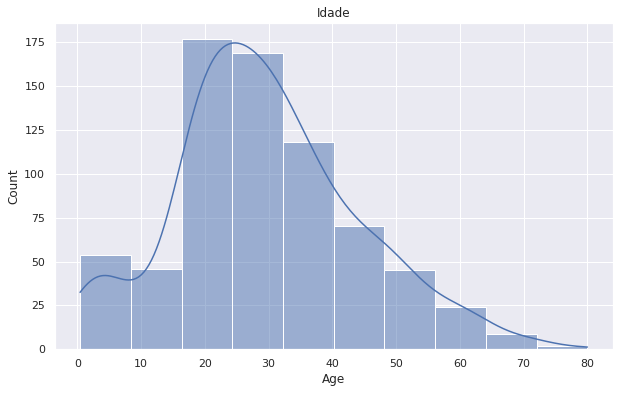

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],kde=True,bins=10)
plt.title('Idade')
plt.show()

#####5. SibSp

Tipo da variável: Categórica, representando o número de irmãos e cônjuges à bordo do Titanic

Input esperado: entradas de numeros inteiros, com múltiplas entradas sem valor (0 ou nulo) pois a uma boa parte das pessoas pode ter viajado sem familia, incluindo tripulação. 

Problemas identificados:
* 0 Entradas nulas, porem 283 entradas zeradas. 

A Coluna requer atenção para tratamento em alguns pontos: 

* Como que 8 pessoas supostamente tem irmãos à bordo, mas o numero de ocorrencias refletido não é multiplo de 8? seria um typo?
* Provocação parecida com a entrada de 5 irmãos/conjunes, por que ela so aparece 1x? 


In [ ]:
desbribeColumn(df, 6)

Coluna SibSp: 

Número de entradas nulas: 0


Dados estatísticos: 

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64


SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


##### 6. Parch

Tipo da variável: Categórica, representando o número de figuras parentais ou filhos à bordo do Titanic

Input esperado: entradas de numeros inteiros, com multiplas entradas sem valor (0 ou nulo) pois a uma boa parte das pessoas pode ter viajado sem familia, incluindo tripulação. 

Problemas identificados:
* 0 Entradas nulas, porem 324 entradas zeradas. 

A Coluna requer atenção para tratamento em alguns pontos: 
* Como é possível haver uma única entrada de uma pessoa com 6 ou 9 conjujes/filhos? 

Parece ter alguma sujeira nessa coluna também, importante avaliar mediante contexto

In [ ]:
desbribeColumn(df, 7)

Coluna Parch: 

Número de entradas nulas: 0


Dados estatísticos: 

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


Parch
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


##### 7. Ticket

Tipo da variável: Categórica, representando a numeração do bilhete do passageiro.

Input esperado: Valores sequenciais que variam a depender do porto em que o passageiro embarcou.

Problemas identificados:
* 0 Entradas nulas

Da mesma forma que 'PassengerId', a variável não contribui para a análise da sobrevivência durante o pré-processamento ou construção de modelo.

In [ ]:
desbribeColumn(df, 8)

Coluna Ticket: 

Número de entradas nulas: 0


Dados estatísticos: 

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object


Ticket
1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
345572      1
345364      1
343276      1
343275      1
347464      1
Name: Ticket, Length: 681, dtype: int64


##### 8. Fare

Tipo da variável: Contínua, representando o valor da passagem pago pelo passageiro.

Input esperado: Entradas referentes ao valor das passagens, com decimais. 

Problemas identificados:
* 0 Entradas nulas

A váriavel pode trazer um olhar mais específico sobre a taxa de sobrevivência em relação à classe, visto a diferença de acomodações dentro da mesma classe.

In [ ]:
desbribeColumn(df, 9)

Coluna Fare: 

Número de entradas nulas: 0


Dados estatísticos: 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.1125      1
8.1375      1
17.4000     1
8.1583      1
7.7292      1
Name: Fare, Length: 248, dtype: int64


##### 9. Cabin

Tipo da variável: Categórica, representando o nível da cabine do passageiro.

Input esperado: Entradas de strings iniciadas por uma letra classificadora seguida da numeração da cabine.

Problemas identificados:
* 688 Entradas nulas
    * **Qual a estratégia adotada para tratar esses casos?**
    * Uma análise com 'Pclass' e 'Fare' pode ser válida para preencher esses campos?

A Coluna requer atenção para tratamento em alguns pontos: 
* Entradas com dois ou mais números de cabine.
    * Talvez seja necessário derivar as entradas em novas categorias considerando apenas a letra inicial.

Parece ter alguma sujeira nessa coluna também, importante avaliar mediante contexto.


In [ ]:
desbribeColumn(df, 10)

Coluna Cabin: 

Número de entradas nulas: 688


Dados estatísticos: 

count     203
unique    146
top        G6
freq        4
Name: Cabin, dtype: object


Cabin
G6             4
B96 B98        4
C23 C25 C27    4
D              3
E101           3
              ..
C101           1
B94            1
B86            1
B82 B84        1
C62 C64        1
Name: Cabin, Length: 146, dtype: int64


##### 10. Embarked

Tipo da variável: Categórica, representando qual o porto em que o passageiro embarcou.

Input esperado: S = Southampton, C = Cherbourg-Octeville, Q = Queenstown

Problemas identificados:
* 2 Entradas nulas

Dados parecem consistentes e, com exceção dos dois registros nulo que precisaram de um pequeno tratamento, não parecem demandar ações ulteriores. 

In [ ]:
desbribeColumn(df, 11)

Coluna Embarked: 

Número de entradas nulas: 2


Dados estatísticos: 

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


#### Análise de variáveis numéricas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        203 non-null    object  
 11  Embarked     889 non-null    category
dtypes: bool(1), category(3), float64(2), int64(3), object(3)
memory usage: 59.7+ KB


<Figure size 6400x4800 with 0 Axes>

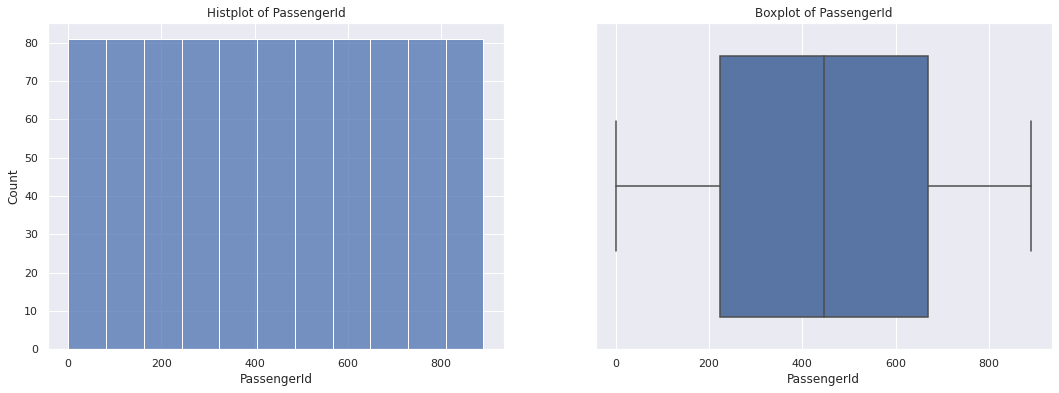

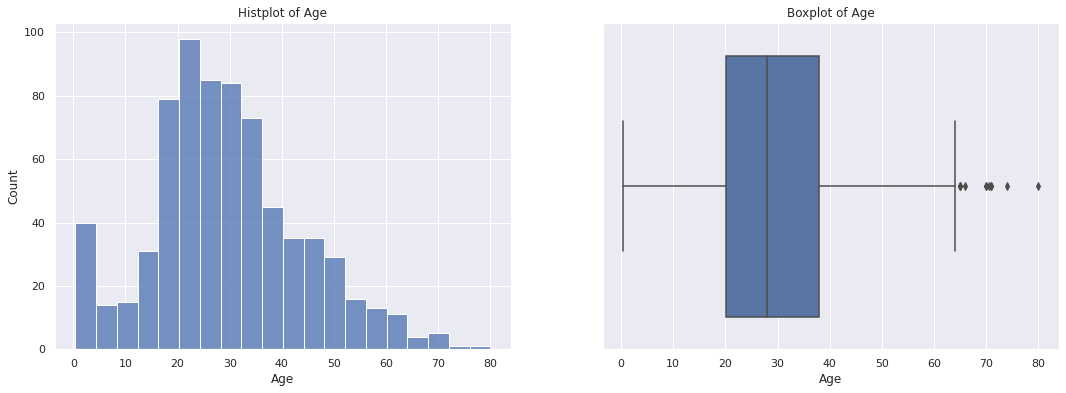

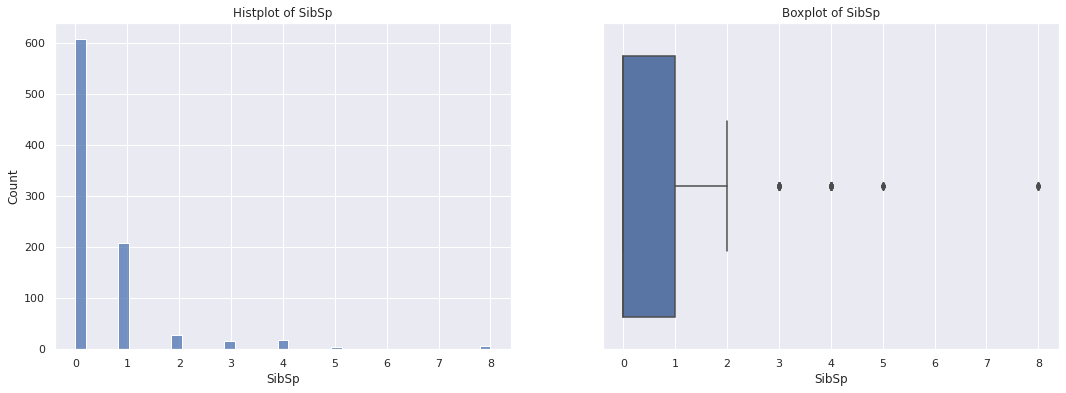

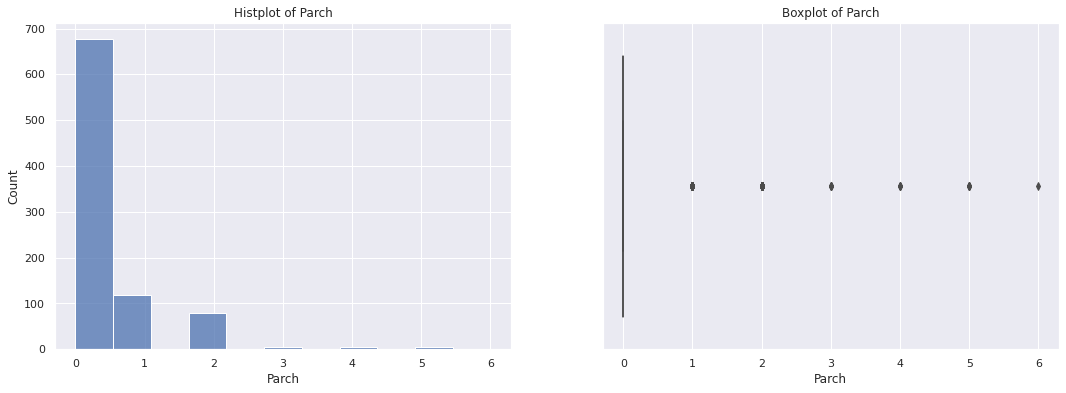

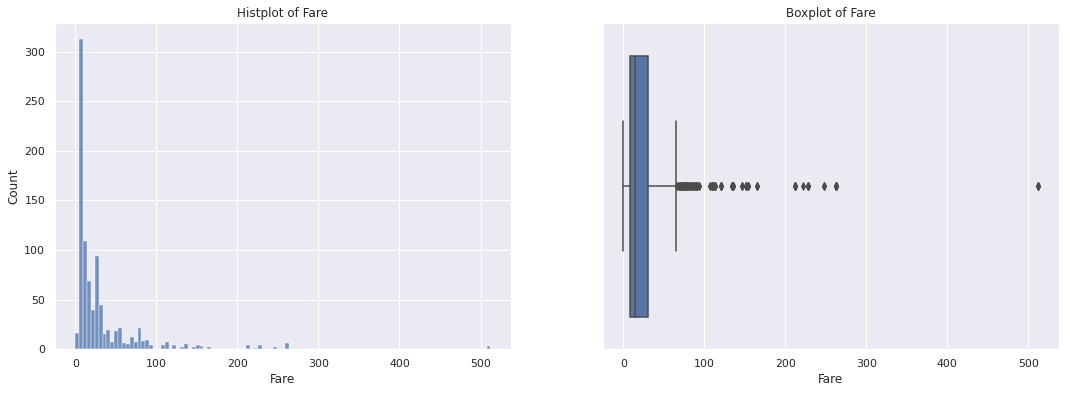

In [ ]:
df1 = df.select_dtypes([np.int, np.float])
numeric_variables_graphs =  {}
plt.figure(figsize=(80, 60), dpi=80)
for i, column in enumerate(df1.columns):
    fig, ax = plt.subplots(1,2,figsize=(18, 6))
    sns.histplot(ax=ax[0],data=df1, x=column).set(title = "Histplot of " + column)
    sns.boxplot(x=df1[column]).set(title = "Boxplot of " + column)
    numeric_variables_graphs[column] = fig

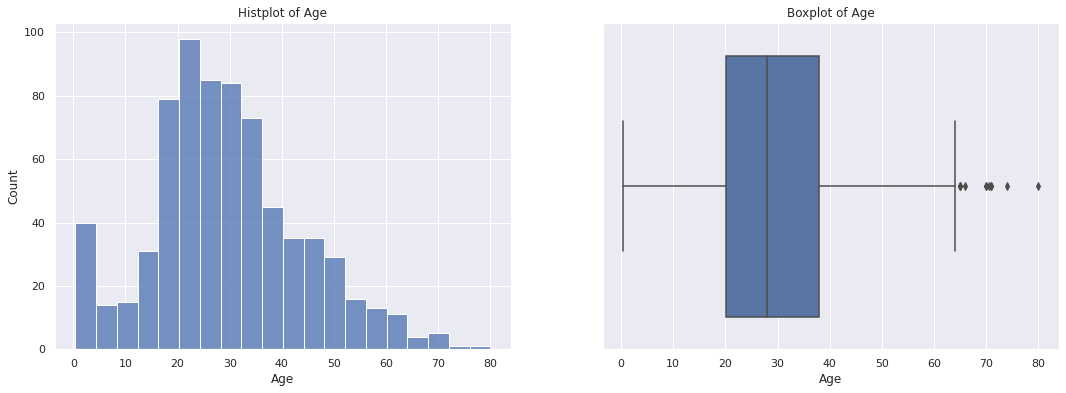

In [ ]:
numeric_variables_graphs["Age"]

A variável se comporta como uma distribuição normal, com o pico entre 20 e 30 anos. Isso nos permite usar metodos estatisticos que dependem de uma distribuição normal. Há um desbalanceamento para direita.

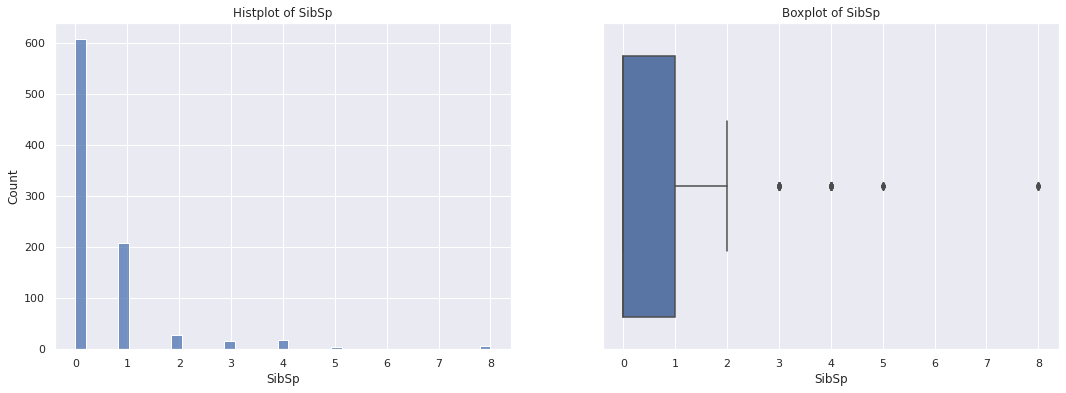

In [ ]:
numeric_variables_graphs["SibSp"]

A variável não segue uma distribuição normal, conta com a presença de alguns outliers que a principio não parecem ser dados falsos, apenas um desvio do padrão.

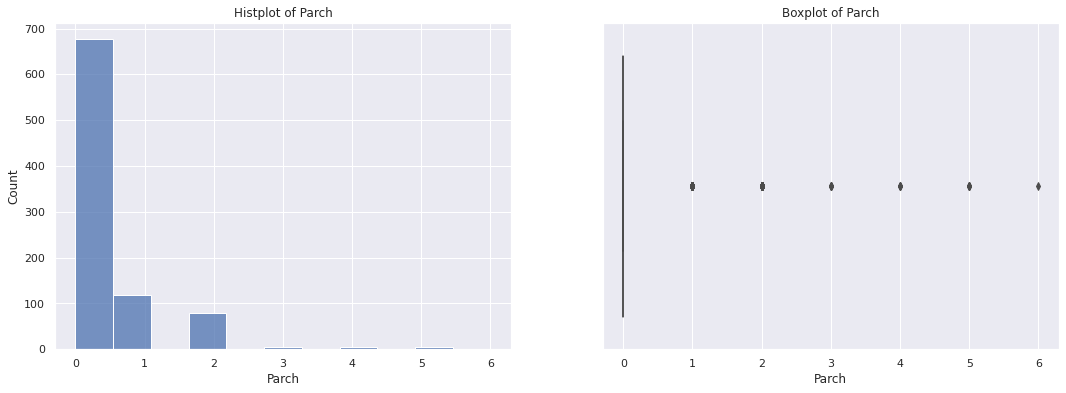

In [ ]:
numeric_variables_graphs["Parch"]

A maioria dos tripulantes possuem pais ou fihos igual a 0, o que pode indicar valores não informados e sendo preenchidos com 0, talvez possa ser criada um atribuito binario para identificação de presença ou não de pai ou filho.

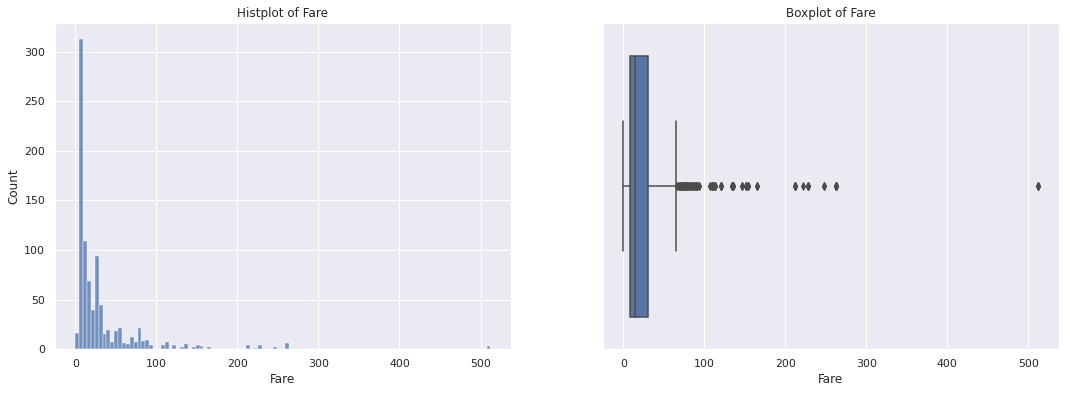

In [ ]:
numeric_variables_graphs["Fare"]

Há uma pequena porcentagem de pessoas que não pagaram a passagem, acreditamos que sejam funcionários do navio ou crianças. Há muitos outliers mas ainda não é possivel inferir se são valores falsos, é preciso entender a lógica do pagamento. 

#### Análise de variáveis contínuas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        203 non-null    object  
 11  Embarked     889 non-null    category
dtypes: bool(1), category(3), float64(2), int64(3), object(3)
memory usage: 59.7+ KB


In [ ]:
(df.Pclass.value_counts()/len(df)*100).to_frame()

,Pclass
3,55.106622
1,24.242424
2,20.650954


A maior parte das pessoas estão concentradas no grupo 3 que representa a classe econômica mais baixa.

In [ ]:
(df.Sex.value_counts()/len(df)*100).to_frame()

,Sex
male,64.758698
female,35.241302


Há um desbalanceamento significativo para homens no dataset

In [ ]:
(df.Embarked.value_counts()/len(df)*100).to_frame()

,Embarked
S,72.278339
C,18.855219
Q,8.641975


Este atributo permite visualizar que a quantidade de embarques foi decrescendo ao longo do trajeto.

### Análise Multivariada

Como o foco de nossa análise é identificar padrões com o target (coluna survived), a análise multivariada será muito mais focada nessa variável específica.

<Figure size 6400x4800 with 0 Axes>

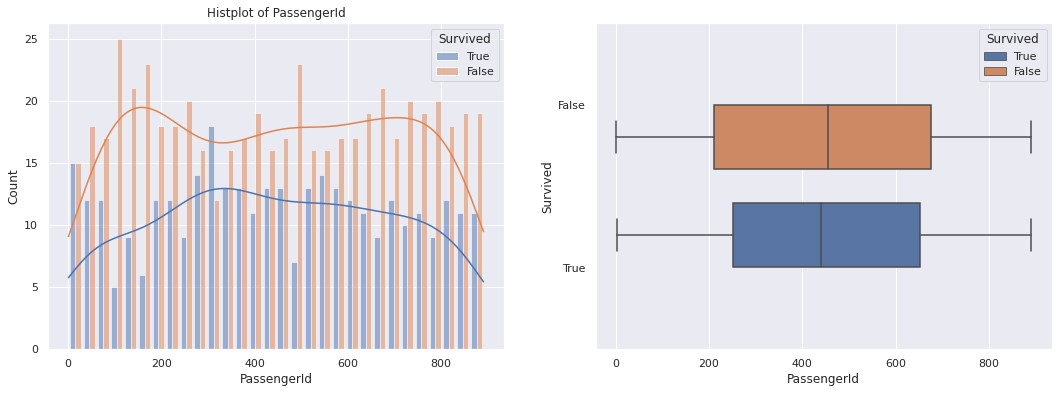

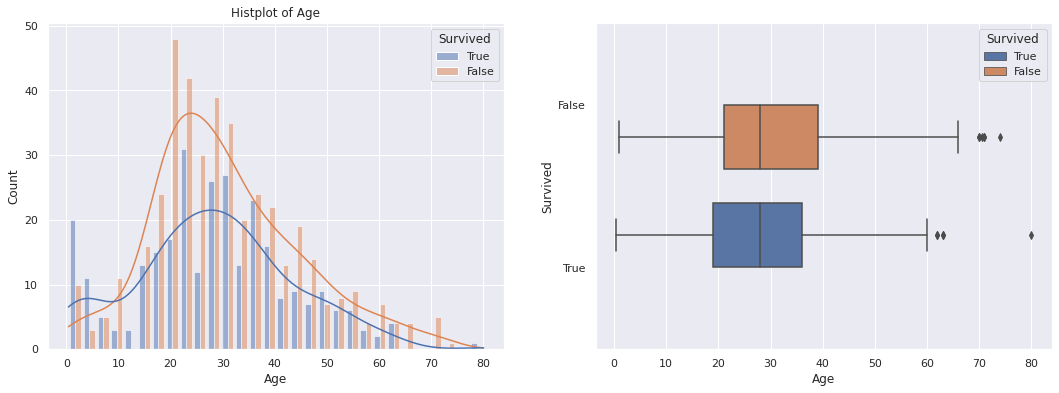

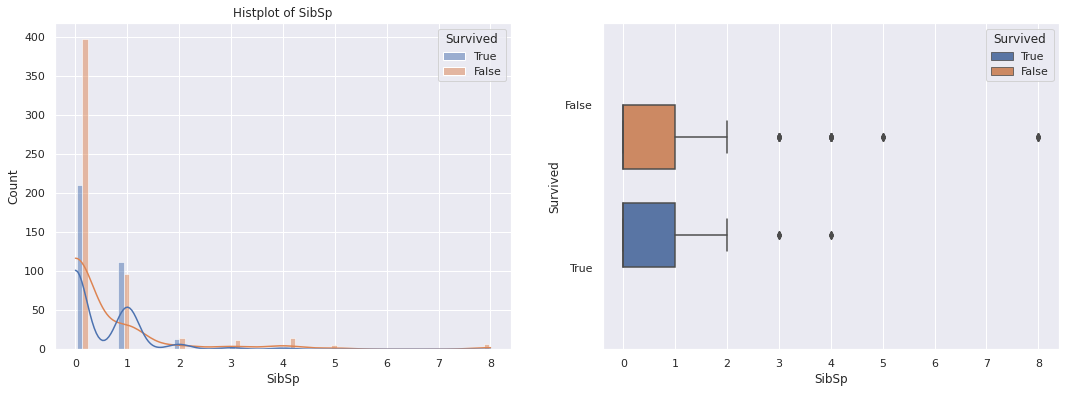

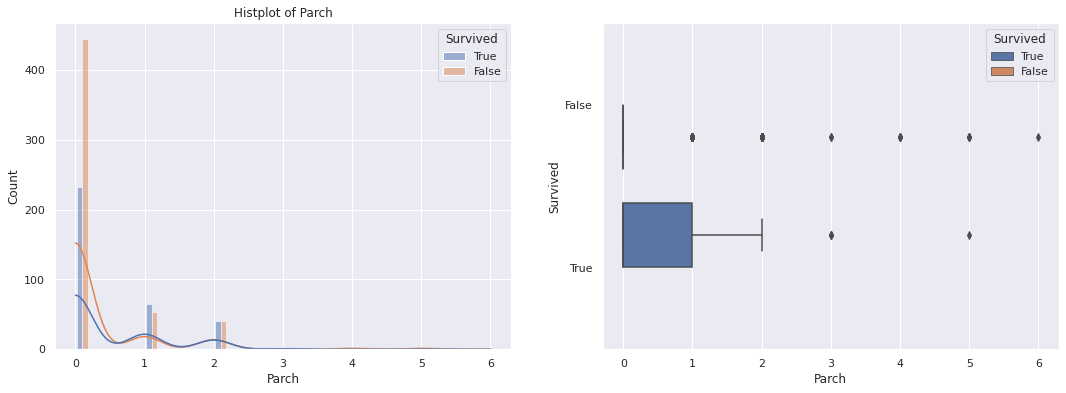

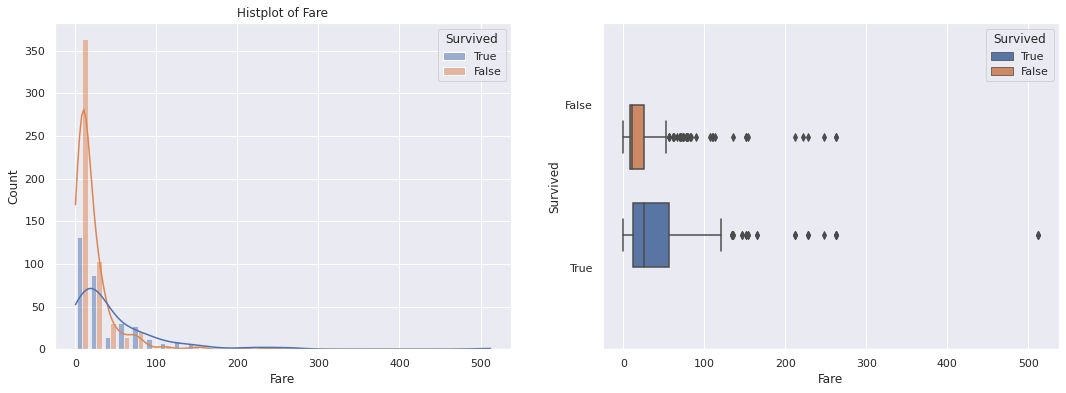

In [ ]:
df1 = df.select_dtypes([np.int, np.float])
columns = df1.columns
df1["Survived"] = df["Survived"].astype("category")
numeric_variables_graphs_per_survived =  {}
plt.figure(figsize=(80, 60), dpi=80)
for i, column in enumerate(columns):
    fig, ax = plt.subplots(1,2,figsize=(18, 6))
    sns.histplot(ax=ax[0],data=df1, x=column, hue='Survived',hue_order=[True,False],shrink=.8,multiple="dodge",bins=30,color='red',kde=True).set(title = "Histplot of " + column)
    sns.boxplot(data=df1,x=column, y='Survived',hue='Survived',hue_order=[True,False])  
    numeric_variables_graphs_per_survived[column] = fig

In [ ]:
df['Age'].quantile(0.25)

20.125

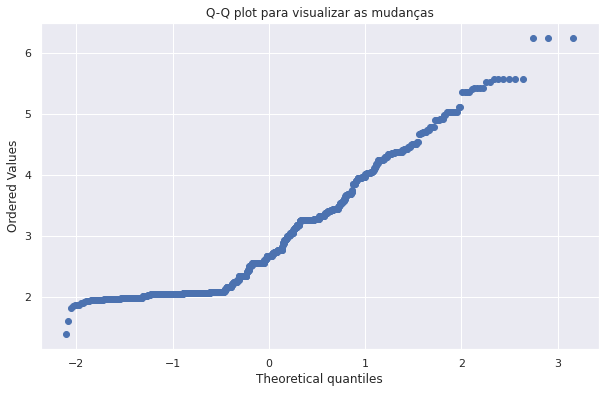

In [ ]:
plt.figure(figsize=(10,6))
stats.probplot(df['Fare'].apply(np.log), plot= plt, dist="norm")
plt.title('Q-Q plot para visualizar as mudanças')
plt.show()

## Limpando as variáveis indesejadas

In [ ]:
# df = df.drop(['PassengerId','Ticket'], axis=1)

## Tratamento outliers

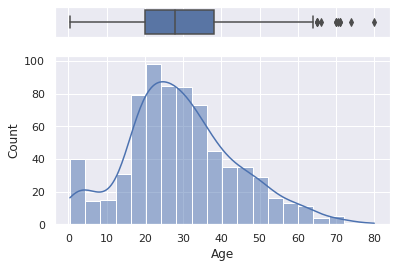

In [ ]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df,x='Age', ax=ax_box)
sns.histplot(data=df, x="Age", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

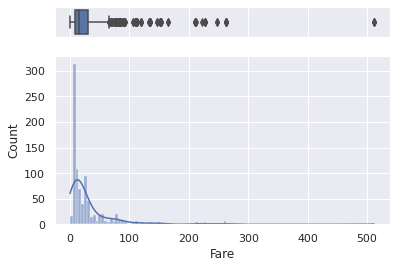

In [ ]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df,x='Fare', ax=ax_box)
sns.histplot(data=df, x="Fare", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

<Figure size 6400x4800 with 0 Axes>

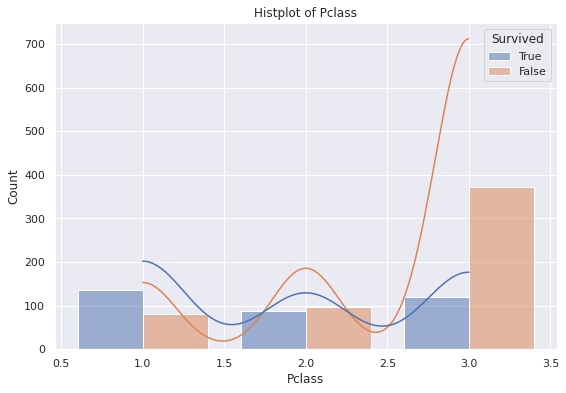

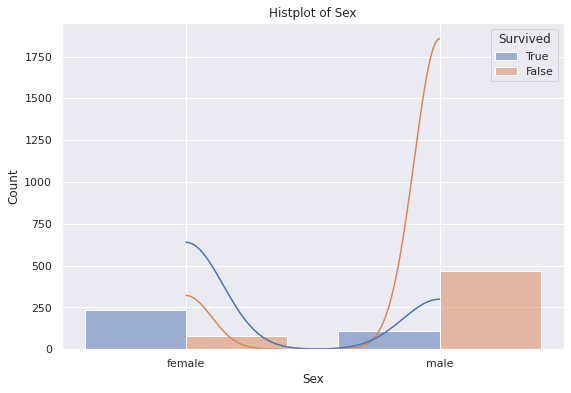

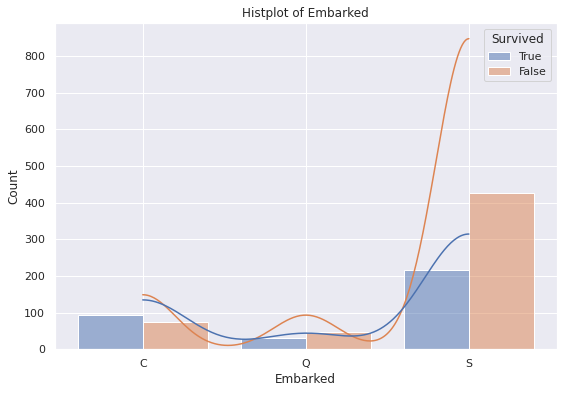

In [ ]:
df1 = df.select_dtypes(['category'])
columns = df1.columns
df1["Survived"] = df["Survived"].astype("category")
category_variables_graphs_per_survived =  {}
plt.figure(figsize=(80, 60), dpi=80)
for i, column in enumerate(columns):
    fig, ax = plt.subplots(1,1,figsize=(9, 6))
    sns.histplot(data=df1, x=column, hue='Survived',hue_order=[True,False],shrink=.8,multiple="dodge",bins=30,color='red',kde=True).set(title = "Histplot of " + column)
    category_variables_graphs_per_survived[column] = fig

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        203 non-null    object  
 11  Embarked     889 non-null    category
dtypes: bool(1), category(3), float64(2), int64(3), object(3)
memory usage: 59.7+ KB


In [ ]:
df1 = df.select_dtypes(['category'])
columns = df1.columns
df1["Survived"] = df["Survived"].astype("category")
category_variables_tables_per_survived =  {}
plt.figure(figsize=(80, 60), dpi=80)
for i, column in enumerate(columns):
    grouped = df.groupby([column])['Survived'].value_counts()
    percentages = (grouped / grouped.groupby(level=0).sum()) * 100
    category_variables_tables_per_survived[column] = percentages.to_frame()

<Figure size 6400x4800 with 0 Axes>

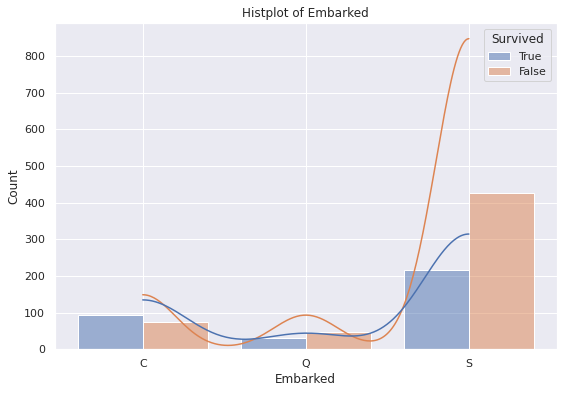

In [ ]:
category_variables_graphs_per_survived['Embarked']

In [ ]:
category_variables_tables_per_survived['Embarked']

Survived
Embarked Survived           
C        True      55.357143
         False     44.642857
Q        False     61.038961
         True      38.961039
S        False     66.304348
         True      33.695652

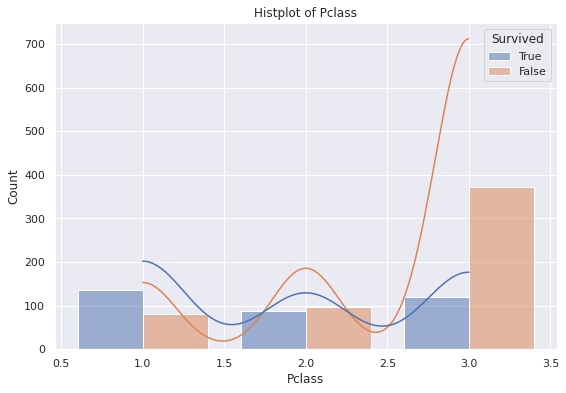

In [ ]:
category_variables_graphs_per_survived['Pclass']

In [ ]:
category_variables_tables_per_survived['Pclass']

Survived
Pclass Survived           
1      True      62.962963
       False     37.037037
2      False     52.717391
       True      47.282609
3      False     75.763747
       True      24.236253

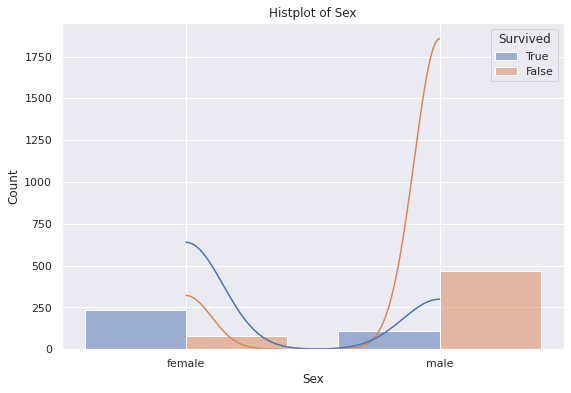

In [ ]:
category_variables_graphs_per_survived['Sex']

In [ ]:
category_variables_tables_per_survived['Sex']

Survived
Sex    Survived           
female True      74.203822
       False     25.796178
male   False     81.109185
       True      18.890815

### Removendo outliers das variáveis "Age" e "Fare"

A remoção de outliers está comentada por utilizarmos o método de agrupamento dos outliers em bins coerentes, minimizando o efeito do outlier e evitando a remoção do dado.

In [ ]:
# Q3 = df['Age'].quantile(0.75)
# Q1 = df['Age'].quantile(0.25)
# IQR = Q3-Q1
# upper = Q3+(1.5*IQR)
# lower = Q1-(1.5*IQR)

In [ ]:
# df = df[(df['Age']>lower) & (df['Age']<upper)]

In [ ]:
# sns.set(style="darkgrid")
# f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# sns.boxplot(data=df,x='Age', ax=ax_box)
# sns.histplot(data=df, x="Age", ax=ax_hist,kde=True)
# ax_box.set(xlabel='')
# plt.show()

In [ ]:
# Q3 = df['Fare'].quantile(0.75)
# Q1 = df['Fare'].quantile(0.25)
# IQR = Q3-Q1
# upper = Q3+(1.5*IQR)
# lower = Q1-(1.5*IQR)

In [ ]:
# df = df[(df['Fare']>lower) & (df['Fare']<upper)]

In [ ]:
# sns.set(style="darkgrid")
# f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# sns.boxplot(data=df,x='Fare', ax=ax_box)
# sns.histplot(data=df, x="Fare", ax=ax_hist,kde=True)
# ax_box.set(xlabel='')
# plt.show()

**Observações:**
- Idade média agora é 28 anos
- 75% da variável 'Age' está abaixo de 36 e 25% abaixo de 20
- Tarifca média agora é 17
- 75% da variável 'Fare' está abaixo de 26 e 25% abaixo de 8



## Tratamento de dados faltantes

Foi identificado dentro da variavel name o termo "master", que permite estimar a idade da criança entre 10 e 13 anos.

In [ ]:
df[(df['Age'].isna())&(isMale(df['Sex']))&( columnCointainsString(df['Name'],"Master"))]

#precisamos identificas os master que tem menos de 13 anos dentro das idades vazias.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
65,66,True,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
159,160,False,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
176,177,False,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
709,710,True,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C


In [ ]:
df[ (columnCointainsString(df['Name'],"Master"))&(isMale(df['Sex']))&(df['Age'].notna())][['Age']].describe()
#Verificando moda e média

,Age
count,36.000000
mean,4.574167
std,3.619872
min,0.420000
25%,1.000000
50%,3.500000
75%,8.000000
max,12.000000


In [ ]:
df[ (columnCointainsString(df['Name'],"Master"))&(isMale(df['Sex']))&(df['Age'].notna())][['Age']].describe().loc["50%"][0]


3.5

In [ ]:
df[(df['Age'].isna())&(df['Sex']=='female')&( df['Name'].str.contains("Miss"))] # Miss pode ser usado para pessoas solteiras, não apenas crianças

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
28,29,True,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,True,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
47,48,True,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q
82,83,True,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
109,110,True,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q
128,129,True,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
180,181,False,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
198,199,True,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q
229,230,False,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
235,236,False,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S


#### Substitução

A fim de evitar Data Leakage, ao invés de substituir pela mediana, ao final do código, os dados que possuem idade nula e título Master serão agrupadas no grupo de bebês.

In [ ]:
# mediana = df[ (columnCointainsString(df['Name'],"Master"))&(isMale(df['Sex']))&(df['Age'].notna())][['Age']].describe().loc["50%"][0]
# df['Age'] = np.where((df['Age'].isna())&(isMale(df['Sex']))&( columnCointainsString(df['Name'],"Master")&(df['Parch']>0)) , mediana,df['Age'])

In [ ]:
# df.drop(columns=['Name'],inplace=True)
# df.drop(columns=['PassengerId'],inplace=True)
# df.reset_index(drop=True)

#### Reanalise dados faltantes

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          688
Embarked         2
dtype: int64

In [ ]:
# df['Cabin'] = df['Cabin'].fillna(method='bfill')
# df['Cabin'] = df['Cabin'].fillna(method='ffill')


In [ ]:
print(df.info(),'\n')

print('Agora não tem mais nenhum valor nulo')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        203 non-null    object  
 11  Embarked     889 non-null    category
dtypes: bool(1), category(3), float64(2), int64(3), object(3)
memory usage: 59.7+ KB
None 

Agora não tem mais nenhum valor nulo


## Reanálise

### Analise Multivariada

#### 1. Pclass

#####2. Name

tipo da variável - nominal 

É a string que representa o nome do passageiro do navio

Input esperado: uma entrada unica tipo OBJECT para cada linha

Problemas identificados:
* 0 Entradas nulas
* 0 Entradas duplicadas

* essa é uma coluna completamente irrelevante para um contexto de predição de taxa de sobrevivencia, poderia receber algum tratamento mas para esse estudo ela foi desconsiderada. 

In [ ]:
desbribeColumn(df, 3)

Coluna Name: 

Número de entradas nulas: 0


Dados estatísticos: 

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object


Name
Abbing, Mr. Anthony                        1
Nysveen, Mr. Johan Hansen                  1
Nicholson, Mr. Arthur Ernest               1
Nicola-Yarred, Master. Elias               1
Nicola-Yarred, Miss. Jamila                1
                                          ..
Goodwin, Miss. Lillian Amy                 1
Goodwin, Mr. Charles Edward                1
Goodwin, Mrs. Frederick (Augusta Tyler)    1
Graham, Miss. Margaret Edith               1
van Melkebeke, Mr. Philemon                1
Name: Name, Length: 891, dtype: int64


#####3. Sex

tipo da variável - Categorica

Define o genero cujo passageiro se identifica

Input esperado: classificações de genero impostas pelo formulário

Problemas identificados:
* 0 Entradas nulas
* 0 Entradas duplicadas
* 0 Entradas conflitantes

A coluna em específico não requer tratamento


In [ ]:
desbribeColumn(df,4)

Coluna Sex: 

Número de entradas nulas: 0


Dados estatísticos: 

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object


Sex
male      577
female    314
Name: Sex, dtype: int64


####4. Age vs Survived

array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ])

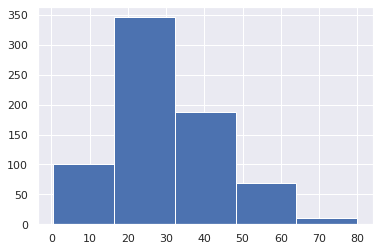

In [ ]:
plt.hist(df['Age'], bins=5)[1]

In [ ]:
def Ageband(df):
  df_age = df.copy()
  df_age['Ageband'] = pd.cut(df_age['Age'], 5)
  return df_age[['Ageband', 'Survived']].groupby(['Ageband'], as_index=False).mean().sort_values(by='Ageband', ascending=True)

Ageband(df)

,Ageband,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


####4. Age vs Fare based on Sex

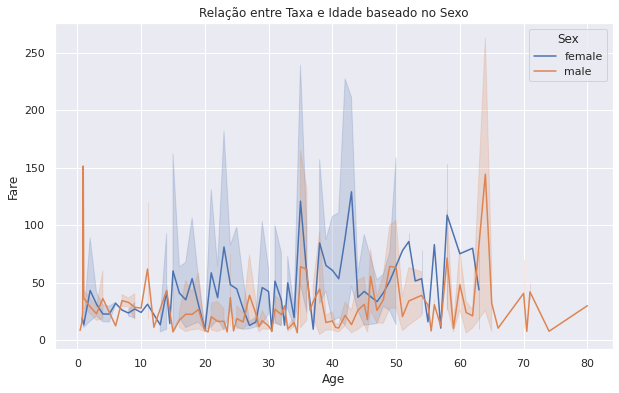

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Age',y='Fare',data=df,hue='Sex')
plt.title('Relação entre Taxa e Idade baseado no Sexo')
plt.show()

####5. SibSp & Parch vs Survived




In [ ]:
# class CustomAttributes(BaseEstimator, TransformerMixin):
#     def fit(self, df):
#         return self
    
#     def transform(self, df):
#         df_family = df.copy()
#         df_family['FamilySize'] = df_family['SibSp'] + df_family['Parch']
#         df_family = df_family.drop(['SibSp','Parch'], axis=1)
        
#         df_family['IsAlone'] = 0
#         df_family.loc[df_family['FamilySize'] == 1, 'IsAlone'] = 1
#         # df_family = df_family.drop('FamilySize', axis=1)
        
#         df_family['Age*Class'] = df_family.Age * df_family.Pclass
        
#         return df_family

#### Analise de variáveis numéricas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        203 non-null    object  
 11  Embarked     889 non-null    category
dtypes: bool(1), category(3), float64(2), int64(3), object(3)
memory usage: 59.7+ KB


<Figure size 6400x4800 with 0 Axes>

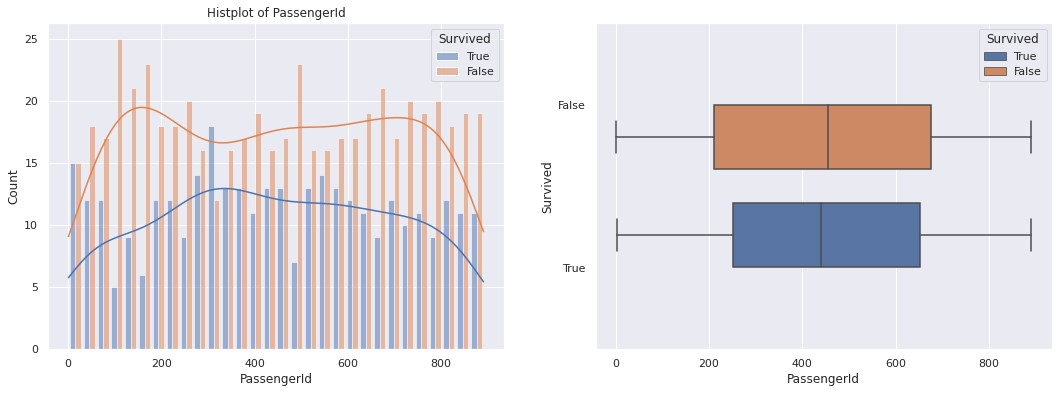

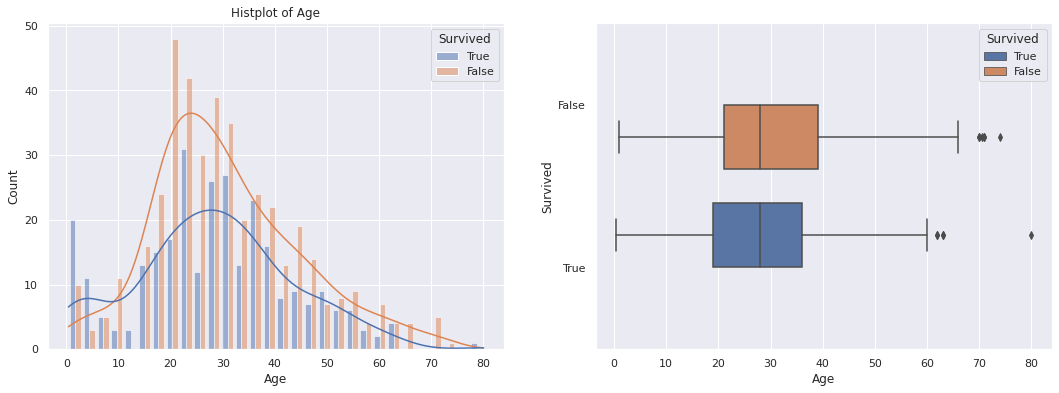

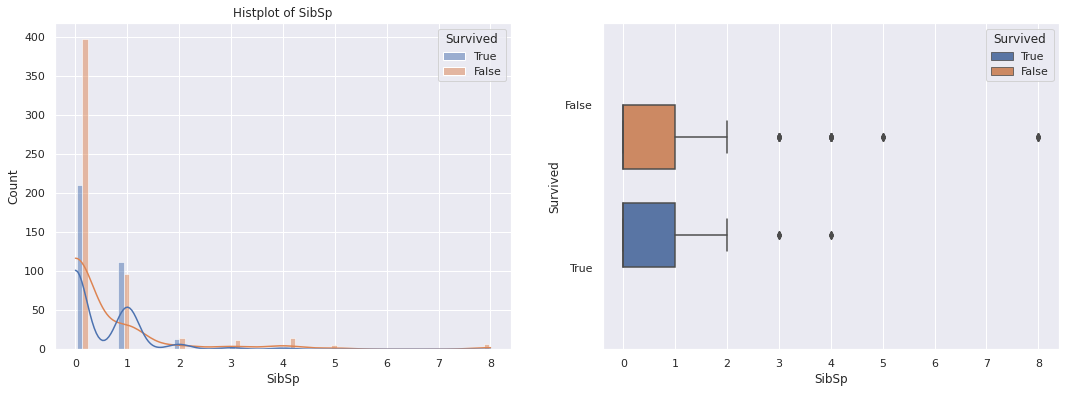

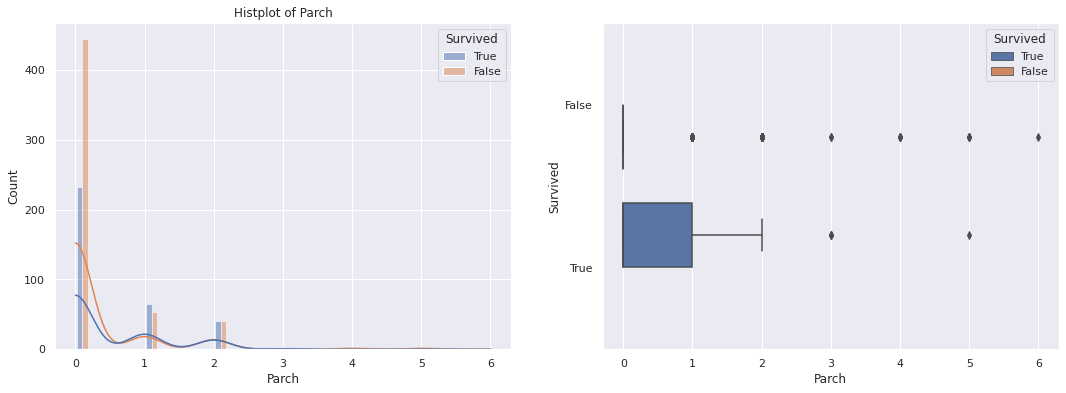

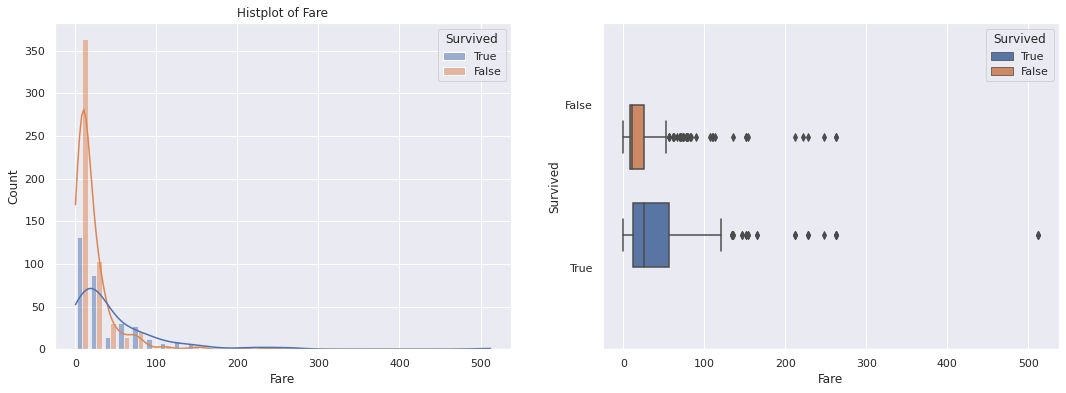

In [ ]:
df1 = df.select_dtypes([np.int, np.float])
columns = df1.columns
df1["Survived"] = df["Survived"].astype("category")
numeric_variables_graphs_per_survived =  {}
plt.figure(figsize=(80, 60), dpi=80)
for i, column in enumerate(columns):
    fig, ax = plt.subplots(1,2,figsize=(18, 6))
    sns.histplot(ax=ax[0],data=df1, x=column, hue='Survived',hue_order=[True,False],shrink=.8,multiple="dodge",bins=30,color='red',kde=True).set(title = "Histplot of " + column)
    sns.boxplot(data=df1,x=column, y='Survived',hue='Survived',hue_order=[True,False])  
    numeric_variables_graphs_per_survived[column] = fig

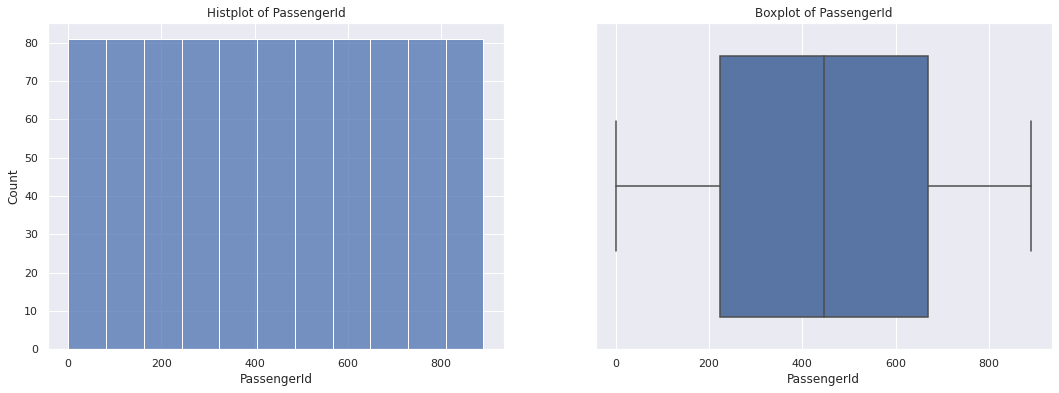

In [ ]:
numeric_variables_graphs["PassengerId"]

PassengerId como esperado não tras nem uma valor ao dataset já que todos os valores são unicos, isso pode ser visto na distribuição uniforme entra 900 e 1300

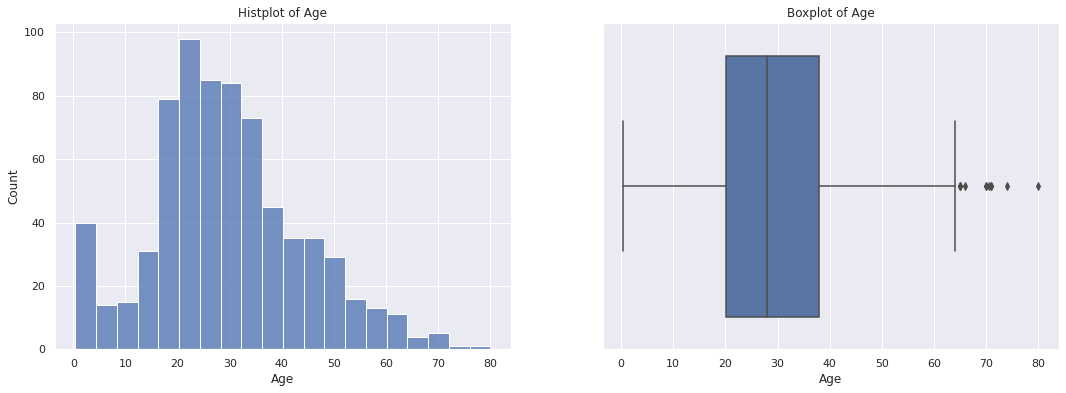

In [ ]:
numeric_variables_graphs["Age"]

A variavel se comporta como uma distribuição normal, com o pico entre 20 e 30 anos. Isso nos permite usar metodos estatisticos que dependem de uma distribuição normal. Há um desbalanceamento para direita

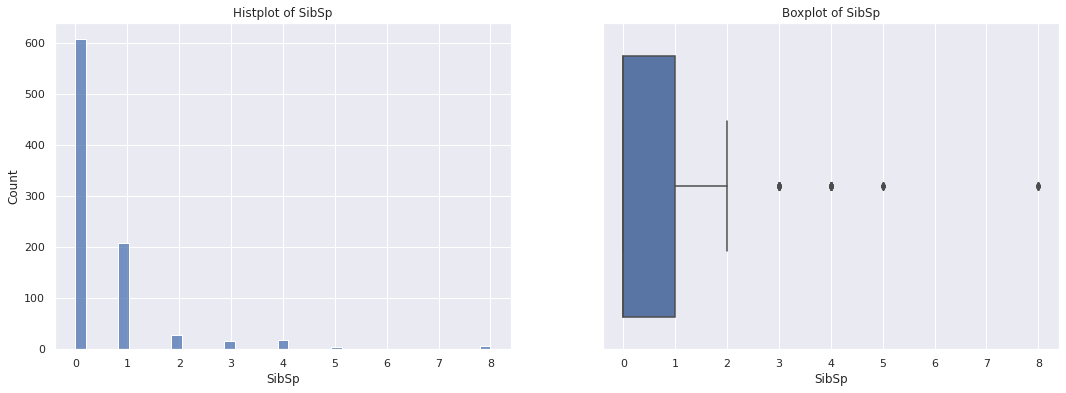

In [ ]:
numeric_variables_graphs["SibSp"]

A não segue uma distribuição normal, conta com a presença de alguns outliers que a principio não parecem ser dados falsos, apenas um desvio do padrão.

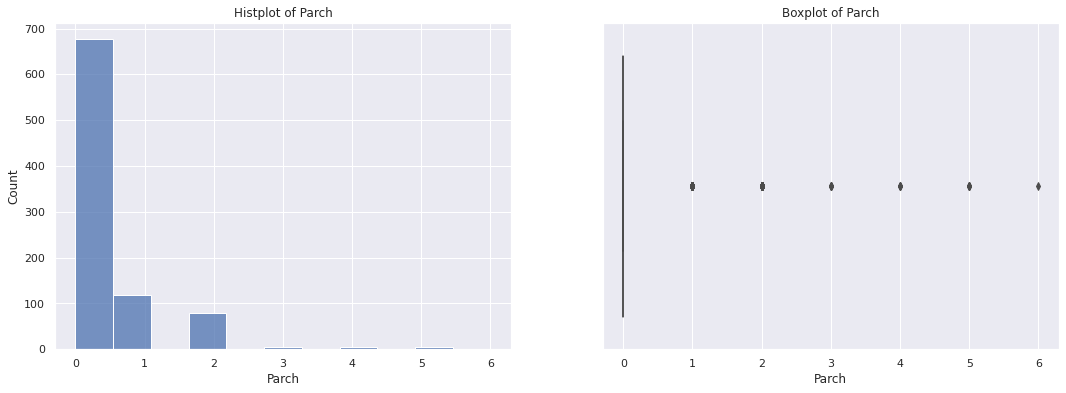

In [ ]:
numeric_variables_graphs["Parch"]

A maioria dos reipulantes possuem pais ou fihos  igual a 0, o que pode indicar valores não informados e sendo preenchidos com 0, talvez possa ser criada um atribuito binario para identificação de presença ou não de pai ou filho.

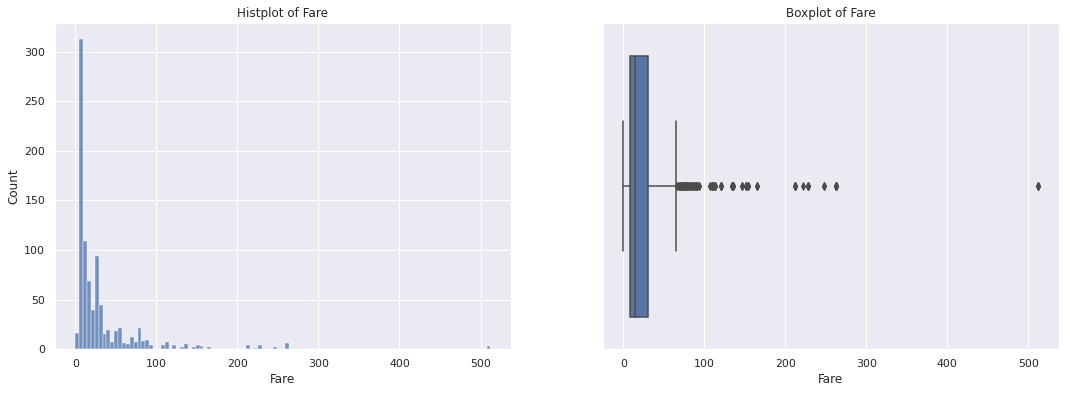

In [ ]:
numeric_variables_graphs["Fare"]

Há uma pequena porcentagem de poessoas que não pagaram a passagem, acreditamos que sejam funcionarios do navio ou crianças. Há muitos outliers mas ainda não é possivel inferir se são valores falsos, é preciso entender a lógica do pagamento. 

#### Análise de variáveis continuas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    bool    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        203 non-null    object  
 11  Embarked     889 non-null    category
dtypes: bool(1), category(3), float64(2), int64(3), object(3)
memory usage: 59.7+ KB


In [ ]:
(df.Pclass.value_counts()/len(df)*100).to_frame()

,Pclass
3,55.106622
1,24.242424
2,20.650954


A maior parte das pessoas estão concentradas no grupo 3 que representa a classe econômica mais baixa.

In [ ]:
(df.Sex.value_counts()/len(df)*100).to_frame()

,Sex
male,64.758698
female,35.241302


Há um desbalanceamento significativo para homens no dataset

In [ ]:
(df.Embarked.value_counts()/len(df)*100).to_frame()

,Embarked
S,72.278339
C,18.855219
Q,8.641975


Este atributo permite visualizar que a quantidade de embarques foi descrescendo ao longo do trajeto.

### Analise Multivariada

Como o foco de nossa análise é indentificar padrões com o target (coluna survived), a análise multivariada será muito mais focada nessa variável específica.

In [ ]:
# df1 = df['floor']
# columns = df1.columns
# df1["Survived"] = df["Survived"].astype("category")
# category_variables_graphs_per_survived =  {}
# plt.figure(figsize=(80, 60), dpi=80)
# for i, column in enumerate(columns):
    # fig, ax = plt.subplots(1,1,figsize=(9, 6))
    # sns.histplot(data=df1, x=column, hue='Survived',hue_order=[True,False],shrink=.8,multiple="dodge",bins=30,color='red',kde=True).set(title = "Histplot of " + column)
    # category_variables_graphs_per_survived[column] = fig

In [ ]:

# category_variables_tables_per_survived['floor']


Podemos ver que a variavel suvived tem algum tipo de correlção com os andares do navio, representados pela variavel "floor". Passageiros dos andares 2 a 6 tiveram mais pessoas que sobreviveram, sendo o andar 6 o que obteve maior porcentagem de sobreviventes.

In [ ]:
# numeric_variables_graphs_per_survived["Age"]


Ao verificar a relação de sobreviventes por idade podemos ver que a media da idade de pessoas que sobreviveram é menor que a de pessoas que não sobreviveram,.Também é possivel observar que os idosos representados por outliers se fazem mais presentes no grupo de sobreviventes que no grupo dos não sobreviventes.
Já olhando o grupo dos não sobreviventes podemos afirmar que a maioria das pessoas que o compõe tem entre 20 e 30 anos.

In [ ]:
# df1 = df[['floor','isChild']]
# columns = df1.columns
# df1["Survived"] = df["Survived"].astype("category")
# category_variables_tables_per_survived =  {}
# plt.figure(figsize=(80, 60), dpi=80)
# for i, column in enumerate(columns):
#     grouped = df.groupby([column])['Survived'].value_counts()
#     percentages = (grouped / grouped.groupby(level=0).sum()) * 100
#     category_variables_tables_per_survived[column] = percentages.to_frame()

In [ ]:

# category_variables_tables_per_survived['isChild']


In [ ]:
# df1 = df[['floor','Age_group']]
# columns = df1.columns
# df1["Survived"] = df["Survived"].astype("category")
# category_variables_tables_per_survived =  {}
# plt.figure(figsize=(80, 60), dpi=80)
# for i, column in enumerate(columns):
#     grouped = df.groupby([column])['Survived'].value_counts()
#     percentages = (grouped / grouped.groupby(level=0).sum()) * 100
#     category_variables_tables_per_survived[column] = percentages.to_frame()

In [ ]:
# category_variables_tables_per_survived['Age_group']

## Data Processing

In [ ]:
class PreProcesser:    
    def __init__(self, train_df:pd.DataFrame):

        isClass1 = train_df['Pclass']==1
        isClass2 = train_df['Pclass']==2
        isClass3 = train_df['Pclass']==3

        isMale = train_df['Sex']=="male"
        isFemale = train_df['Sex']=="female"
        ageNotNan = train_df['Age'].notna()

        self.ageMedianaMaleClass1 = train_df[(isClass1)&(isMale)&(ageNotNan)][['Age']].describe().loc["50%"][0]

        self.ageMedianaMaleClass2 = train_df[((isClass2))&(isMale)&(ageNotNan)][['Age']].describe().loc["50%"][0]

        self.ageMedianaMaleClass3 = train_df[((isClass3))&(isMale)&(ageNotNan)][['Age']].describe().loc["50%"][0]

        self.ageMedianaFemaleClass1 = train_df[((isClass1))&(isFemale)&(ageNotNan)][['Age']].describe().loc["50%"][0]

        self.ageMedianaFemaleClass2 = train_df[((isClass2))&(isFemale)&(ageNotNan)][['Age']].describe().loc["50%"][0]

        self.ageMedianaFemaleClass3 = train_df[((isClass3))&(isFemale)&(ageNotNan)][['Age']].describe().loc["50%"][0]

        self.ageMedianMaleMasters = df[ (columnCointainsString(df['Name'],"Master"))&(isMale)&(ageNotNan)][['Age']].describe().loc["50%"][0]

    def applyPreprocessing(self,df:pd.DataFrame):
        
        df['CabinProcessed'] = df['Cabin'].str[0]

        df = self.__preProcessAge(df)
        df = self.__createAgeCategory(df)
        df = self.__createFareCategory(df)
        df = self.__categorizeFamily(df)
        df = self.__encodeCategoryToNumber(df)

        return df[['Pclass', 'Sex', 'AgeCategory', 'hasLateralFamily', 'hasVerticalFamily', 'FareCategory', 'Embarked', 'CabinProcessed']]

    
    def applyPreprocessingWithSurvived(self,df:pd.DataFrame):
        
        df['CabinProcessed'] = df['Cabin'].str[0]

        df = self.__preProcessAge(df)
        df = self.__createAgeCategory(df)
        df = self.__createFareCategory(df)
        df = self.__categorizeFamily(df)
        df = self.__encodeCategoryToNumber(df)

        return df[['Survived','Pclass', 'Sex', 'AgeCategory', 'hasLateralFamily', 'hasVerticalFamily', 'FareCategory', 'Embarked', 'CabinProcessed']]

    def dropIrrelevantColumns(self,df):
                
        df.drop(columns=['Name'],inplace=True)
        df.reset_index(drop=True)
        df.drop(['PassengerId','Ticket'],inplace=True)
        return df
    
    def __encodeCategoryToNumber(self,df:pd.DataFrame):
        columns = df.columns.tolist()
        columns.remove('PassengerId')
        columns.remove('Ticket')
        columns.remove('Name')
        columns.remove('Cabin')


        le = LabelEncoder()
        for col in columns:
            if df[col].dtype == np.number:
                continue 
            else:
                df[col] = le.fit_transform(df[col])

        return df


    def __categorizeFamily(self,df:pd.DataFrame):
        df['hasLateralFamily'] = df['SibSp']>0
        df['hasVerticalFamily'] = df['Parch']>0
        return df

    def __createAgeCategory(self,df:pd.DataFrame):
        
        #Criação de bins para diminuir o ruído. 'Binning' é o processo de agrupar valores em cestas ou intervalos
        bins = [0, 1, 5, 12, 18, 35, 60, np.inf]

        #Criação de 6 categorias para idade
        labels = [0,1, 2, 3, 4, 5, 6]
        df['AgeCategory'] = pd.cut(df['Age'], bins, labels=labels)
        df['AgeCategory'] = df['AgeCategory'].astype(float)
        
        return df

    def __createFareCategory(self,df:pd.DataFrame):

        #Criação de bins para a variável 'Fare'
        bins = [-np.inf, 10, 50, 100, np.inf]

        #Criação de 4 categorias para tarifa
        labels = [0, 1, 2, 3]
        df['FareCategory'] = pd.cut(df['Fare'], bins, labels=labels)
        df['FareCategory'] = df['FareCategory'].astype(float)
        return df


    def __preProcessAge(self,df:pd.DataFrame):

        

        isClass1 = df['Pclass']==1
        isClass2 = df['Pclass']==2
        isClass3 = df['Pclass']==3

        isMale = df['Sex']=="male"
        isFemale = df['Sex']=="female"
        ageIsNan = df['Age'].isna()


        df['Age'] = np.where((ageIsNan)&(isMale)&(columnCointainsString(df['Name'],"Master")) ,  self.ageMedianMaleMasters,df['Age'])
        
        df['Age'] = np.where((ageIsNan)&(isMale)&((isClass1)) , self.ageMedianaMaleClass1,df['Age'])
        # Substituição por mediana sexo masculino com idade faltante na classe 1

        df['Age'] = np.where((ageIsNan)&(isMale)&((isClass2)) , self.ageMedianaMaleClass2,df['Age'])
        # Substituição por mediana sexo masculino com idade faltante na classe 2

        df['Age'] = np.where((ageIsNan)&(isMale)&((isClass3)) , self.ageMedianaMaleClass3,df['Age'])
        # Substituição por mediana sexo masculino com idade faltante na classe 3

        df['Age'] = np.where((ageIsNan)&((isFemale))&((isClass1)) , self.ageMedianaFemaleClass1,df['Age'])
        # Substituição por mediana sexo femenino com idade faltante na classe 1

        df['Age'] = np.where((ageIsNan)&((isFemale))&((isClass2)) , self.ageMedianaFemaleClass2,df['Age'])
        # Substituição por mediana sexo femenino com idade faltante na classe 2

        df['Age'] = np.where((ageIsNan)&((isFemale))&((isClass3)) , self.ageMedianaFemaleClass3,df['Age'])
        # Substituição por mediana sexo femenino com idade faltante na classe 3

        return df



In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,False,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,True,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,False,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Drop da coluna 'Survived' do dataset final para criar a matrix 'X', de treino.
X = df.drop('Survived', axis=1)

# Apontanto a coluna 'Survived' como alvo da variável 'y', como variável alvo, para testes
y = df['Survived']

# Separando as bases entre treino e teste
train_df, test_df, train_target,test_target = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
preProcesser = PreProcesser(train_df)

In [ ]:
train_df = preProcesser.applyPreprocessing(train_df)

In [ ]:
test_df = preProcesser.applyPreprocessing(test_df)

In [ ]:
preProcesser = PreProcesser(df_submission)

KeyError: ignored

In [ ]:
df_submission = pd.DataFrame(pd.read_csv(r"https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv"))

In [ ]:
df_test = preProcesser.applyPreprocessingWithSurvived(df.copy())
corr_df = df_test.corr(method='pearson')
plt.matshow(corr_df)
plt.show()
print(corr_df, "\n")

Podemos notar que AgeCategory não possui uma boa correlação com o target, logo iremos modificar seu calculo para poder melhor ajustar à expectativa.

Data Modeling e Separação de Bases

In [ ]:

def applyModel(classifier,train_df,train_target,test_df,test_target):
    classifier.fit(train_df, train_target)
    y_pred = classifier.predict(test_df)
    
    # Definindo os métodos de avaliação
    accuracy = accuracy_score(test_target, y_pred)
    precision = precision_score(test_target, y_pred)
    recall = recall_score(test_target, y_pred)
    f1 = f1_score(test_target, y_pred)
    
    # Adicionando os resultados na lista
    result = {
        'Classificador': classifier.__class__.__name__,
        'Acurácia': accuracy,
        'Precisão': precision,
        'Recall': recall,
        'F1': f1
    }
    return result

In [ ]:
classifier.fit(train_df, train_target)
y_pred2 = classifier.predict(df_submission)

In [ ]:
# Definindo os classificadores
classifiers = [
    DecisionTreeClassifier(random_state = 40),
    RandomForestClassifier(random_state = 40, n_estimators = 100),
    KNeighborsClassifier()
]

In [ ]:
# Apresentando os resultados
results = []

for classifier in classifiers:
    result = applyModel(classifier,train_df,train_target,test_df,test_target)
    results.append(result)

# Convertendo o resultado num data
df_resultado = pd.DataFrame(results)

print(df_resultado)

In [ ]:
applyModel(RandomForestClassifier(random_state = 70, n_estimators = 10),train_df,train_target,test_df,test_target)

In [ ]:
def normalizeDataframe(df:pd.DataFrame):
    return (df-df.mean())/df.std()

In [ ]:
applyModel(KNeighborsClassifier(
n_neighbors=5,  weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None

),normalizeDataframe(train_df),train_target,normalizeDataframe(test_df),test_target)

In [ ]:
applyModel(KNeighborsClassifier(
n_neighbors=1,  weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None


),normalizeDataframe(train_df),train_target,normalizeDataframe(test_df),test_target)

In [ ]:
df_submission

In [ ]:
applyModel(KNeighborsClassifier(
n_neighbors=1,  weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None


),normalizeDataframe(train_df),train_target,normalizeDataframe(test_df),test_target)

In [ ]:
df_submission2 = pd.DataFrame(pd.read_csv(r"https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv")["PassengerId"])
df_submission2["Survived"] = 
df_submission2.index = df_submission2["PassengerId"]
df_submission2.drop(columns="PassengerId", inplace=True)
df_submission2.to_csv("sub_rf.csv")

In [ ]:

applyModel(KNeighborsClassifier(
n_neighbors=1,  weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None


),normalizeDataframe(train_df),train_target,normalizeDataframe(test_df),test_target)

In [ ]:
applyModel(KNeighborsClassifier(
n_neighbors=1,  weights='distance', algorithm='auto', leaf_size=40, p=2, metric='minkowski', metric_params=None, n_jobs=None


),normalizeDataframe(train_df),train_target,normalizeDataframe(test_df),test_target)

In [ ]:
applyModel(KNeighborsClassifier(
n_neighbors=1,  weights='distance', algorithm='auto', leaf_size=30, p=4, metric='minkowski', metric_params=None, n_jobs=None


),normalizeDataframe(train_df),train_target,normalizeDataframe(test_df),test_target)

Com base nos resultados da modelagem do dados fornecidos, podemos observar que o classificador KNN tem o maior recall e índice F1 do que os outros (parâmetros: n_neighbors=1,  weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
.

Considerando as informações apresentadas, é válido concluir que o classificador KNN é o melhor neste cenário, dentre os testados.

In [ ]:
train_target.value_counts()

A variável "Survived" está desbalanceada, com 390 instâncias '0' (não sobreviveu) e apenas 216 instâncias '1' (sobreviveu). Isso significa que qualquer modelo treinado nesses dados pode ter um viés para a categoria majoritária e pode não ter um desempenho tão bom na classe minoritária. Para resolver esse desequilíbrio, executaremos uma técnica de reamostragem dos dados no intuito de mitigar esse efeito

In [ ]:
# Instanciando os algoritmos de reamostragem
smote = SMOTE()
adasyn = ADASYN()

# Reamostrando usando SMOTE
X_smote, y_smote = smote.fit_resample(train_df, train_target)

# Reamostrando usando ADASYN
X_adasyn, y_adasyn = adasyn.fit_resample(train_df, train_target)

print('Variável "Survived" depois do SMOTE', y_smote.value_counts())
print('---'*40)
print('Variável "Survived" depois do ADASYN', y_adasyn.value_counts())

In [ ]:
results_smote = []

for classifier in classifiers:
    classifier.fit(X_smote, y_smote)
    y_pred_smote = classifier.predict(test_df)
    
    # Definindo os métodos de avaliação
    accuracy_smote = accuracy_score(test_target, y_pred_smote)
    precision_smote = precision_score(test_target, y_pred_smote)
    recall_smote = recall_score(test_target, y_pred_smote)
    f1_smote = f1_score(test_target, y_pred_smote)
    
    # Adicionando os resultados na lista
    results_smote.append({
        'Classificador': classifier.__class__.__name__,
        'Acurácia': accuracy_smote,
        'Precisão': precision_smote,
        'Recall': recall_smote,
        'F1': f1_smote
    })

# Convertendo o resultado num data
df_resultado_smote = pd.DataFrame(results_smote)

print(df_resultado_smote)

Comparando com os resultados anteriores, os classificadores mostraram uma pontuação de precisão muito maior, com a maioria alcançando uma precisão acima de 0,79. Isso sugere que as técnicas de reamostragem usadas para equilibrar o alvo tiveram um impacto positivo no desempenho geral dos modelos. O modelo DecisionTreeClassifier tem uma pontuação de precisão quase em 0,95, superando os outros dois quando na primeira modelagem era o pior classificador. O KNeighborsClassifier teve o aumento menos significativo mas possui bons resultados, enquanto o RandomForestClassifier teve o melhor resultado em média nos dois cenários. No geral, os resultados sugerem que as técnicas de reamostragem são eficazes para abordar a natureza desequilibrada do conjunto de dados do Titanic e melhorar o desempenho dos modelos.

In [ ]:
results_adasyn = []

for classifier in classifiers:
    classifier.fit(X_adasyn, y_adasyn)
    y_pred_adasyn = classifier.predict(test_df)
    
    # Definindo os métodos de avaliação
    accuracy_adasyn = accuracy_score(test_target, y_pred_adasyn)
    precision_adasyn = precision_score(test_target, y_pred_adasyn)
    recall_adasyn = recall_score(test_target, y_pred_adasyn)
    f1_adasyn = f1_score(test_target, y_pred_adasyn)
    
    # Adicionando os resultados na lista
    results_adasyn.append({
        'Classificador': classifier.__class__.__name__,
        'Acurácia': accuracy_adasyn,
        'Precisão': precision_adasyn,
        'Recall': recall_adasyn,
        'F1': f1_adasyn
    })

# Convertendo o resultado num data
df_resultado_adasyn = pd.DataFrame(results_adasyn)

print(df_resultado_adasyn)

A remodelagem ADASYN, embora apresente resultados melhores do que o primeiro resultado, apresentou uma piora em relação ao SMOTE. Apesar do modelo DecisionTreeClassifier continuar com o mesmo desempenho, os outros dois apresentaram uma queda significativa o suficiente para optarmos pelo SMOTE como método de remodelagem.